## Project name: **Movie Recommendation System**
#### By Vivek Manglani

Data downloaded from : https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies

 ## **1. Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import time, datetime
import warnings
warnings.filterwarnings("ignore") 


## **2. Loading the dataset as dataframe**

In [2]:
df = pd.read_csv('TMDB_movie_dataset_v11.csv')

## **3. Knowing the data**

### 3.1 - Columns of dataset

In [3]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages'],
      dtype='object')

### 3.2 - Basic information about data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972627 entries, 0 to 972626
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    972627 non-null  int64  
 1   title                 972616 non-null  object 
 2   vote_average          972627 non-null  float64
 3   vote_count            972627 non-null  int64  
 4   status                972627 non-null  object 
 5   release_date          872461 non-null  object 
 6   revenue               972627 non-null  int64  
 7   runtime               972627 non-null  int64  
 8   adult                 972627 non-null  bool   
 9   backdrop_path         280697 non-null  object 
 10  budget                972627 non-null  int64  
 11  homepage              105765 non-null  object 
 12  imdb_id               563755 non-null  object 
 13  original_language     972627 non-null  object 
 14  original_title        972616 non-null  object 
 15  

### 3.3 - Knowing basiscstatistics of data

In [5]:
df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,9.726270e+05,972627.000000,972627.000000,9.726270e+05,972627.000000,9.726270e+05,972627.000000
mean,6.450200e+05,2.157136,22.047648,7.563314e+05,51.165072,2.970688e+05,1.385451
std,3.454888e+05,3.129226,344.218045,1.779256e+07,62.372094,5.019967e+06,8.190235
min,2.000000e+00,0.000000,0.000000,-1.200000e+01,0.000000,0.000000e+00,0.000000
25%,3.618035e+05,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,0.600000
50%,6.467980e+05,0.000000,0.000000,0.000000e+00,33.000000,0.000000e+00,0.600000
75%,9.461455e+05,5.100000,1.000000,0.000000e+00,90.000000,0.000000e+00,0.934000
max,1.224040e+06,10.000000,34495.000000,2.923706e+09,14400.000000,8.880000e+08,2994.357000


### 3.4 - First five rows of Data

In [6]:
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


### 3.5 - Shape of the data

In [7]:
df.shape

(972627, 23)

### 3.6 - Datatypes of columns

In [8]:
df.dtypes

id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime                   int64
adult                      bool
backdrop_path            object
budget                    int64
homepage                 object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path              object
tagline                  object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
dtype: object

## **4 -Cleaning the data**

### 4.1 - Handling missing values


In [9]:
df.isnull().sum()

id                           0
title                       11
vote_average                 0
vote_count                   0
status                       0
release_date            100166
revenue                      0
runtime                      0
adult                        0
backdrop_path           691930
budget                       0
homepage                866862
imdb_id                 408872
original_language            0
original_title              11
overview                172875
popularity                   0
poster_path             259282
tagline                 832412
genres                  350710
production_companies    503641
production_countries    387219
spoken_languages        379261
dtype: int64

### 4.2 - Dropping the column which is not crucial for analysis

In [10]:
df.drop(columns=['backdrop_path','poster_path','homepage','imdb_id'], inplace=True)

### 4.3 - Removing

In [11]:
df=df.dropna(subset=['overview'])
df=df.dropna(subset=['genres'])
df=df.dropna(subset=['release_date'])


Here we are removing rows from the DataFrame where the 'overview' column has missing or null values. The 'subset' parameter specifies that only the 'overview' column should be checked for null values, and any rows containing null values in this column will be dropped.and similarly for 'genres' column
- This step ensures that the dataset used for analysis and recommendation purposes doesn't have incomplete or null data in these critical columns.

In [12]:
df = df.dropna(subset=['id','title'])

Here we have removed rows from the DataFrame df where either the 'id' or 'title' column has missing values

4.3.1 Imputing 'popularity' column with the mean

In [13]:
mean_popularity = df['popularity'].mean()
df['popularity'].fillna(mean_popularity, inplace=True)

Here by replacing missing 'popularity' values with the mean value of the existing data, the code ensures a reasonable approximation for the missing entries.

In [14]:
df.isnull().sum()

id                           0
title                        0
vote_average                 0
vote_count                   0
status                       0
release_date                 0
revenue                      0
runtime                      0
adult                        0
budget                       0
original_language            0
original_title               0
overview                     0
popularity                   0
tagline                 395477
genres                       0
production_companies    189221
production_countries    109439
spoken_languages        105508
dtype: int64

Now we do not have any null values so we can proceed further. I have not removed the null values of 'tagline' , 'production_companies' ,'production_countries' and 'spoken_languages' colomns because in further process this columns are not crucial for recommending 

### 4.5 - Identifying and Counting Duplicate Rows

In [15]:
df.duplicated().sum()

1

### 4.5.1 - Removing Duplicate Entries from the Dataset

In [16]:
# Remove duplicates in-place based on all columns
df.drop_duplicates(inplace=True)


In [17]:
df.duplicated().sum()

0

## **5 - Visualizing the data**

### 5.1 - Pie Chart: Distribution of Adult and Non-Adult Movies

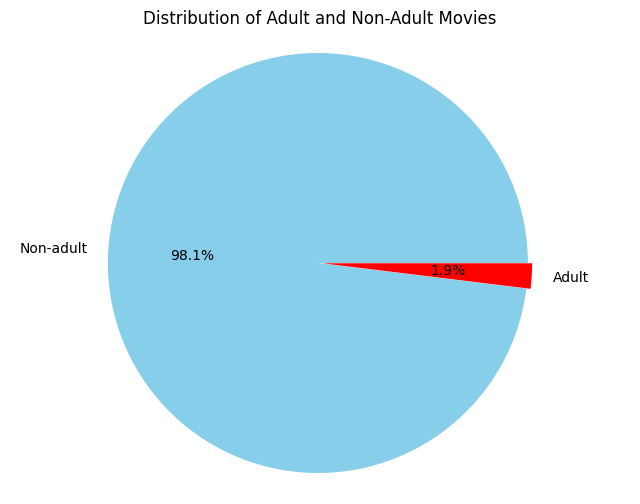

In [18]:
adult_distribution = df['adult'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(adult_distribution, labels=['Non-adult','Adult'], autopct='%1.1f%%', colors=['skyblue', 'red'],explode=(0,0.02))
plt.title('Distribution of Adult and Non-Adult Movies')
plt.axis('equal')  
plt.show()

The pie chart illustrates that approximately 98.1% of movies in the dataset are classified as non-adult, while approximately 1.9% fall into the adult category. This indicates a significant dominance of non-adult movies in the dataset.

## 5.2 - Top 10 popular movies 

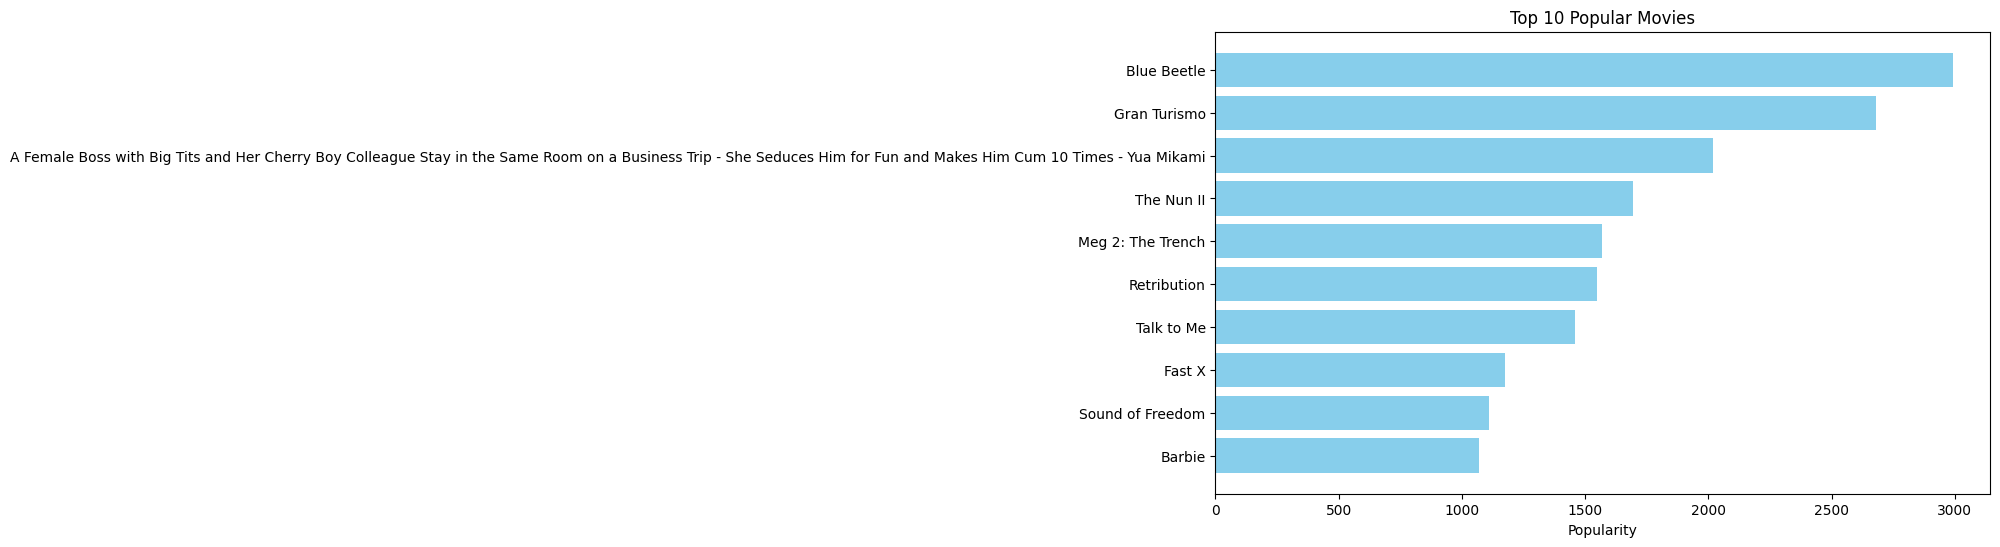

In [19]:
popular = df.nlargest(10, 'popularity')
plt.figure(figsize=(10, 6))
plt.barh(popular['title'],popular['popularity'],color='skyblue')
plt.xlabel('Popularity')
plt.title('Top 10 Popular Movies')
# Inverting y-axis to have the highest popularity at the top
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()


## 5.3 - High Budget Movies

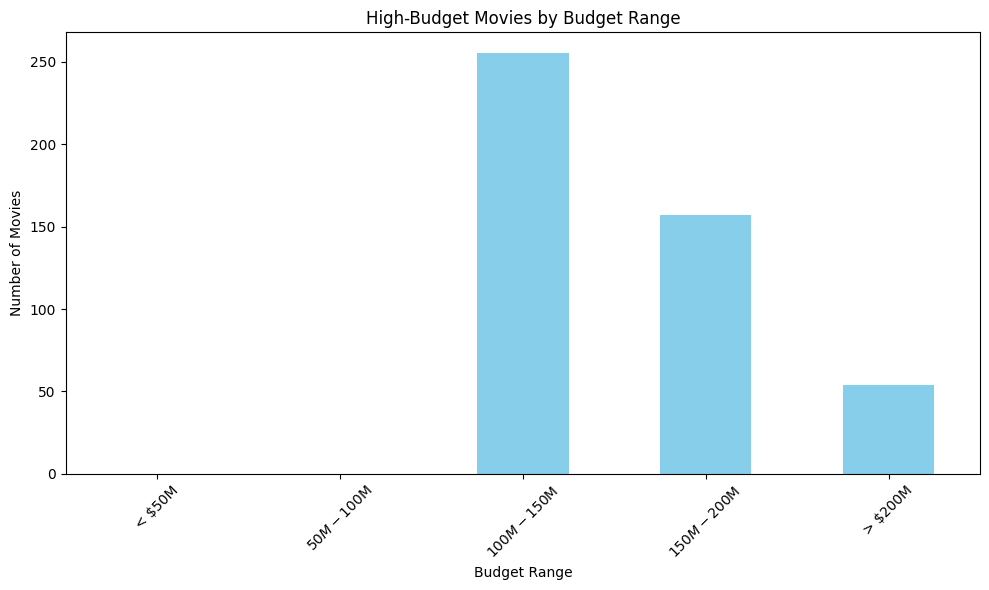

In [20]:
# Defining the budget thresholds for the bins 
bins = [0, 50000000, 100000000, 150000000, 200000000, float('inf')]
labels = ['< $50M', '$50M - $100M', '$100M - $150M', '$150M - $200M', '> $200M']
# Categorizing high-budget movies into budget ranges using pd.cut
high_budget_movies = df[df['budget'] > 100000000] 
high_budget_movies['Budget Range'] = pd.cut(high_budget_movies['budget'], bins=bins, labels=labels)
range_counts = high_budget_movies['Budget Range'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
range_counts.plot(kind='bar', color='skyblue')
plt.title('High-Budget Movies by Budget Range')
plt.xlabel('Budget Range')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Here we can assume that highest budget movies falling within 100 Million to 150 Million budget range.

#### 5.4 - Heatmap


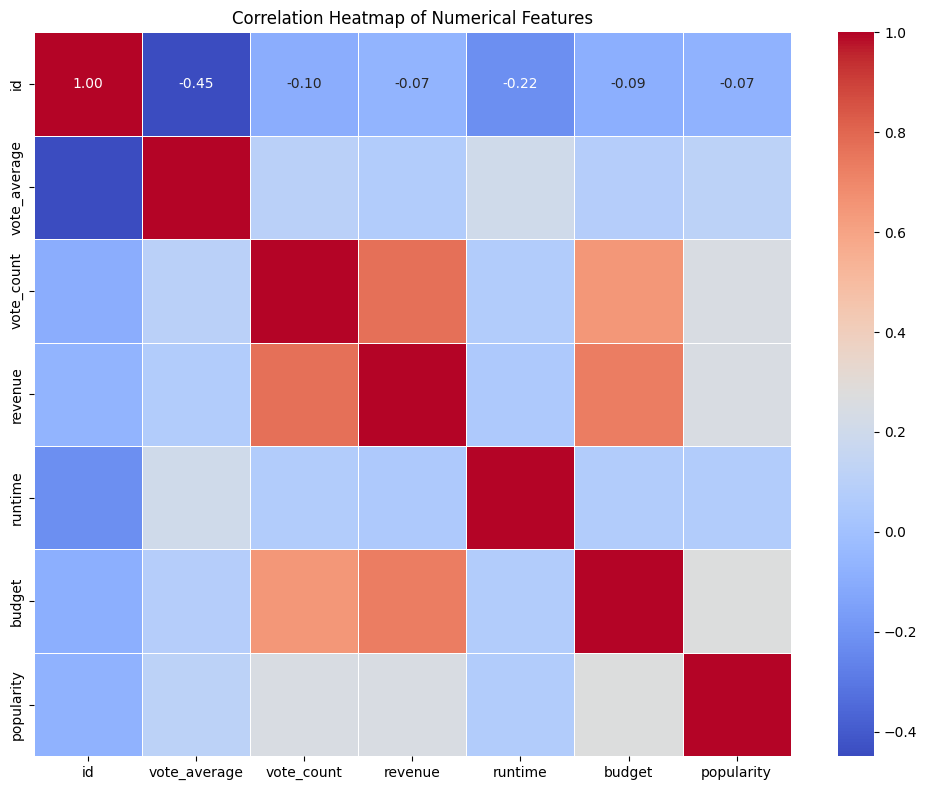

In [21]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()



- **Positive Correlation:** Values close to 1 indicate a strong positive linear relationship between features. As one feature increases, the other tends to increase as well.
  
- **Negative Correlation:** Values close to -1 indicate a strong negative linear relationship between features. When one feature increases, the other tends to decrease.

- **No Correlation (or Weak Correlation):** Values close to 0 imply a weak or no linear relationship between features.

#### Key Findings:

- Feature pairs with a high positive correlation (values closer to 1) indicate a tendency for those features to move together in the same direction.

- Feature pairs with a high negative correlation (values closer to -1) show an inverse relationship where one feature tends to decrease as the other increases.
This analysis provides an initial understanding of the relationships among numerical features based on the correlation heatmap.


## **6 - Preparation for model**

### 6.1 - Selecting Essential Columns for Analysis

In [22]:
df =df[['id','title','genres','adult','overview','popularity']]

In [23]:
df.head()

,id,title,genres,adult,overview,popularity
0,27205,Inception,"Action, Science Fiction, Adventure",False,"Cobb, a skilled thief who commits corporate es...",83.952
1,157336,Interstellar,"Adventure, Drama, Science Fiction",False,The adventures of a group of explorers who mak...,140.241
2,155,The Dark Knight,"Drama, Action, Crime, Thriller",False,Batman raises the stakes in his war on crime. ...,130.643
3,19995,Avatar,"Action, Adventure, Fantasy, Science Fiction",False,"In the 22nd century, a paraplegic Marine is di...",79.932
4,24428,The Avengers,"Science Fiction, Action, Adventure",False,When an unexpected enemy emerges and threatens...,98.082


In [24]:
df.shape

(503262, 6)

## **7 - Preprocessing Data**

#### 7.1 - Converting the string columns in list

In [25]:
df['overview']=df['overview'].apply(lambda x:x.split())

In [26]:
df['genres']=df['genres'].apply(lambda x:x.split(','))

Here we can see in above df.head() that overview and genres are giving significant information about the type of movie so using the words can help us recommend more movies that have same words that why we have first convert it into list.

In [27]:
df.head()

,id,title,genres,adult,overview,popularity
0,27205,Inception,"[Action, Science Fiction, Adventure]",False,"[Cobb,, a, skilled, thief, who, commits, corpo...",83.952
1,157336,Interstellar,"[Adventure, Drama, Science Fiction]",False,"[The, adventures, of, a, group, of, explorers,...",140.241
2,155,The Dark Knight,"[Drama, Action, Crime, Thriller]",False,"[Batman, raises, the, stakes, in, his, war, on...",130.643
3,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",False,"[In, the, 22nd, century,, a, paraplegic, Marin...",79.932
4,24428,The Avengers,"[Science Fiction, Action, Adventure]",False,"[When, an, unexpected, enemy, emerges, and, th...",98.082


#### 7.2 - Making words in column "genres" distinguishable

In [28]:
df['genres'] = df['genres'].apply(lambda x:[i.replace(" ","") for i in x])

Some genre names might contain spaces ('Action', 'Science Fiction', 'Romantic Comedy', etc.), which, if left unchanged, could affect the accuracy of  recommender system.
By removing spaces from genre names ('Action', 'ScienceFiction', 'RomanticComedy'), we create consistent representations of genres, ensuring that similar genres are treated as identical entities.


In [29]:
df.head()

,id,title,genres,adult,overview,popularity
0,27205,Inception,"[Action, ScienceFiction, Adventure]",False,"[Cobb,, a, skilled, thief, who, commits, corpo...",83.952
1,157336,Interstellar,"[Adventure, Drama, ScienceFiction]",False,"[The, adventures, of, a, group, of, explorers,...",140.241
2,155,The Dark Knight,"[Drama, Action, Crime, Thriller]",False,"[Batman, raises, the, stakes, in, his, war, on...",130.643
3,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]",False,"[In, the, 22nd, century,, a, paraplegic, Marin...",79.932
4,24428,The Avengers,"[ScienceFiction, Action, Adventure]",False,"[When, an, unexpected, enemy, emerges, and, th...",98.082


#### 7.3 - Categorizing Movie Content 

In [30]:
df['adult'] = df['adult'].apply(lambda x: 'kidsfriendly' if x == 'False' else 'adult')


Here we are converting the boolean 'adult' column to categories ('kidsfriendly' or 'adult') becuause this categorization enabling the recommender system to give recommendations based on the audience type (e.g., recommending 'kidsfriendly' content to younger audiences). 

In [31]:
df['adult']=df['adult'].apply(lambda x:x.split())

## **8 - Combinig transformed data for training**

In [32]:
df['tags'] =  df['overview'] + df['genres'] + df['adult'] 

## **9 - Creating new dataframe for training**

In [33]:
new_df = df[['id','title','tags']]

In [34]:
new_df

,id,title,tags
0,27205,Inception,"[Cobb,, a, skilled, thief, who, commits, corpo..."
1,157336,Interstellar,"[The, adventures, of, a, group, of, explorers,..."
2,155,The Dark Knight,"[Batman, raises, the, stakes, in, his, war, on..."
3,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
4,24428,The Avengers,"[When, an, unexpected, enemy, emerges, and, th..."
...,...,...,...
972588,650248,Nycto,"[A, short, film, made, by, students, on, the, ..."
972600,650296,Explorers,"[Explorers, is, a, idealistic, look, at, the, ..."
972601,650297,Cursive II,"[Lin, Hwai-min's, Cursive, II, is, inspired, b..."
972608,650249,Victorian Farm Christmas,"[Victorian, Farm, Christmas, looks, into, the,..."


## **10 - Merging Tags into Single Strings**

In [35]:
new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))

## **11 - Integration of NLTK Library for Text Processing**

In [36]:
import nltk

### 11.1 - Initializing Porter Stemmer for Word Stemming

In [37]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

It helps reduce words to their base forms by removing affixes. Initializing this stemmer instance (ps) enables the capability to transform words into their base forms, potentially aiding in text processing  within the movie recommender system

### Stemming Function with Porter Stemmer

In [38]:
def stem(txt):
    y= []
    for i in txt.split():
        y.append(ps.stem(i))
    return " ".join(y)
     

In [39]:
new_df = new_df.head(25000)

**Taking 25k data in dataframe for modeling because not able to perform the process even after increasing paging size.** 
 **Error:**
- <span style="color:red">MemoryError: Unable to allocate 1.84 TiB for an array with shape (253272640644,) and data type int64</span>


This custom stem function encapsulates the logic required to apply stemming operations to text data

### Applying Stemming to 'Tags' Column

In [40]:
new_df['tags'] = new_df['tags'].apply(stem)

### Conversion to Lowercase for 'Tags' Column

In [41]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

This transformation ensures uniformity in the 'tags' column by converting all text to lowercase. Making the text consistent in case facilitates easier comparisons, analysis, or processing within the movie recommender system

## **12 - Importing CountVectorizer for Text Processing**

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

### 12.1 - Setting up CountVectorizer

In [43]:
cv = CountVectorizer(max_features=5000,stop_words='english',encoding='utf-8')

- max_features=5000: It specifies the maximum number of words to consider during text transformation. It limits the features to 11,000, meaning only the top 5000 most frequent words will be retained for vectorization.

- stop_words='english': It declares that English stop words, such as common and less informative words like "the", "and", "is", etc., will be excluded during the text transformation process

In [44]:
vectors = cv.fit_transform(new_df['tags'].values.astype(str))
vectors.shape

(25000, 5000)

Here , By using fit_transform(), the textual information within the 'tags' column is converted into a matrix format suitable for machine learning model. Each row represents a text from the 'tags', and each column denotes a unique word from the vocabulary, with matrix values reflecting the frequency of each word's occurrence in the respective documents.

### 12.2 - Retrieving Feature Names from CountVectorizer

In [45]:
cv.get_feature_names_out()

array(['000', '10', '100', ..., 'zombies', 'zone', 'zoo'], dtype=object)

## **13 - Cosine Similarity Calculation**

In [46]:
from sklearn.metrics.pairwise import cosine_similarity


This function is used to calculate the similarity between different movies based on their feature representations, assisting in recommending similar movies to users based on their preferences.

In [47]:
similar = cosine_similarity(vectors)

In [48]:
similar

array([[1.        , 0.16495722, 0.11026357, ..., 0.05976143, 0.06185896,
        0.04029115],
       [0.16495722, 1.        , 0.0636607 , ..., 0.13801311, 0.04761905,
        0.09304842],
       [0.11026357, 0.0636607 , 1.        , ..., 0.09225312, 0.04774553,
        0.12439408],
       ...,
       [0.05976143, 0.13801311, 0.09225312, ..., 1.        , 0.10350983,
        0.13483997],
       [0.06185896, 0.04761905, 0.04774553, ..., 0.10350983, 1.        ,
        0.04652421],
       [0.04029115, 0.09304842, 0.12439408, ..., 0.13483997, 0.04652421,
        1.        ]])

## **Movie Recommendation Function Based on Similarity**

In [49]:
def recommend(movie):
    index = new_df[new_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similar[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new_df.iloc[i[0]].title)
    

This function performs:
- Retrieving the index of the input movie title within the DataFrame new_df.
- Calculating the similarity scores between the input movie and other movies based on the similar matrix and
Sorts the movies based on their similarity scores in descending order.
- Printing the titles of the top five most similar movies to the provided movie title.

In [50]:
recommend('Avatar')

Dr. Strange
Inuyashiki
Inhumans: The First Chapter
Gintama
Trollhunters: Rise of the Titans


In [51]:
new_df.iloc[111].title

'Now You See Me'